In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
mobiles = pd.read_pickle('data/mobile_subscriptions.pkl')
df_allData = pd.read_pickle('data/df_allData.pkl')

In [5]:
mobiles.head()

,ISO,Year,Mobile Handset Subscription per 100 persons
0,AFG,2014,56.191333
1,AFG,2013,52.966473
2,AFG,2012,49.972753
3,AFG,2011,46.444058
4,AFG,2010,35.467766


In [34]:
df_allData.head()

,Country/Region/World,ISO,Sex,Year,Age-standardised diabetes prevalence,Lower 95% uncertainty interval,Upper 95% uncertainty interval,Mean BMI,Mean BMI lower 95% uncertainty interval,Mean BMI upper 95% uncertainty interval,...,Prevalence of BMI >=40 kg/m² upper 95% uncertainty interval,Mean systolic blood pressure (mmHg),Mean systolic blood pressure lower 95% uncertainty interval (mmHg),Mean systolic blood pressure upper 95% uncertainty interval (mmHg),Mean diastolic blood pressure (mmHg),Mean diastolic blood pressure lower 95% uncertainty interval (mmHg),Mean diastolic blood pressure upper 95% uncertainty interval (mmHg),Prevalence of raised blood pressure,Prevalence of raised blood pressure lower 95% uncertainty interval,Prevalence of raised blood pressure upper 95% uncertainty interval
0,Afghanistan,AFG,Men,1980,0.044712,0.015339,0.094918,19.532923,17.107774,22.010869,...,0.000069,121.779978,113.210227,130.192427,76.662263,71.161397,82.116525,0.259259,0.165976,0.370139
1,Afghanistan,AFG,Men,1981,0.046114,0.016883,0.093777,19.637998,17.232367,22.088491,...,0.000076,121.924842,113.644684,130.108549,76.753616,71.390596,82.029064,0.261067,0.170775,0.367569
2,Afghanistan,AFG,Men,1982,0.047601,0.018745,0.094018,19.741670,17.357383,22.164497,...,0.000083,122.073346,113.918442,130.066324,76.846447,71.554908,81.950016,0.262912,0.174699,0.364517
3,Afghanistan,AFG,Men,1983,0.049173,0.020375,0.093950,19.843253,17.486672,22.266846,...,0.000093,122.224822,114.322121,130.152197,76.939638,71.770334,81.920172,0.264802,0.178516,0.363599
4,Afghanistan,AFG,Men,1984,0.050834,0.022269,0.093679,19.943436,17.650170,22.328421,...,0.000104,122.376956,114.549692,130.312049,77.032372,71.954991,81.872425,0.266719,0.181058,0.362819


In [37]:
df_tmp = df_allData.groupby(['Year']).get_group(2014)


In [38]:
df_tmp = df_tmp.groupby('Sex').get_group('Men')

In [40]:
df_tmp = df_tmp[['ISO','Age-standardised diabetes prevalence','Mean BMI']]

In [13]:
mobiles['Year'] = pd.to_numeric(mobiles['Year'])

In [42]:
mobiles = mobiles.groupby('Year').get_group(2014)

In [44]:
df_tmp = df_tmp.merge(mobiles,on='ISO')

In [45]:
df_tmp.head()

,ISO,Age-standardised diabetes prevalence,Mean BMI,Mobile Handset Subscription per 100 persons
0,AFG,0.115657,22.512386,56.191333
1,ALB,0.076879,26.947170,115.026115
2,DZA,0.122648,24.687904,110.699326
3,ASM,0.308217,33.124245,NaN
4,AND,0.080856,27.472020,83.613345


Text(0.5, 15.439999999999998, 'Mean BMI')

<Figure size 504x504 with 0 Axes>

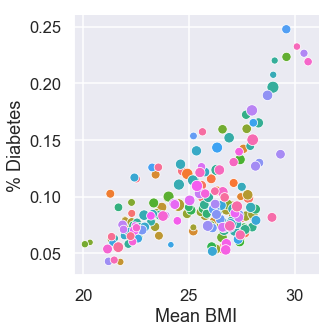

In [65]:
plt.figure(figsize=(7,7))

sns.set_context("talk")
sns.relplot(legend=False, x="Mean BMI",y="Age-standardised diabetes prevalence", hue="ISO", size="Mobile Handset Subscription per 100 persons",data=df_tmp)
plt.ylabel("% Diabetes")
plt.xlabel("Mean BMI")
